Import relevant libraries

In [2]:
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from memory_profiler import profile
from collections import Counter

C:\Users\doron\AppData\Local\Temp\ipykernel_12564\1737598053.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


A function to clean the text and remove any non word. Also make the entire text in lower capitals

In [3]:
def clean_text(text):
    # Add your text cleaning logic here (remove capitalization and punctuation)
    cleaned_text = re.sub(r'[^a-z\s]', '', text.lower())
    return cleaned_text

A function that tokenizes and cleans the corpus for further processing and returns it.

In [4]:
def clean_and_tokenize(corpus):
    return [clean_text(doc).split() for doc in corpus]

A fucntion that recieves the tokenized corpus and creates the vocab, and calculates the word frequency for each word and the document frequcency for each word.

In [5]:
def build_vocab_and_frequencies(tokenized_corpus):
    vocab = {}
    word_freq = []
    doc_freq = []

    for doc_id, doc in enumerate(tokenized_corpus, start=1):
        word_counts = Counter(doc)

        for word, count in word_counts.items():
            if word not in vocab:
                vocab[word] = len(vocab)
                word_freq.append(count)
                doc_freq.append(1)
            else:
                word_freq[vocab[word]] += count
                doc_freq[vocab[word]] += 1

    return vocab, word_freq, doc_freq

A function that recieves the vocab the word frequency and the minimal word frequency. The function removes all the words that have less appearences in the corpus than the minimal threshold and returns the filtered vocab and word frequency.

In [6]:
def remove_low_frequency_words(vocab, word_freq, min_word_freq):
    filtered_vocab = {word: index for word, index in vocab.items() if word_freq[index] >= min_word_freq}
    filtered_word_freq = [freq for index, freq in enumerate(word_freq) if index in filtered_vocab.values()]
    return filtered_vocab, filtered_word_freq

A function that recieves the tokenized corpus, the vocab and the doc frequencies. The function calculates the tfidf matrix and returns it.

In [7]:
def calculate_tfidf(tokenized_corpus, vocab, doc_freq):
    num_docs = len(tokenized_corpus)
    tfidf_matrix = np.zeros((num_docs, len(vocab)))

    # Sort vocab by values
    sorted_vocab = dict(sorted(vocab.items(), key=lambda item: item[1]))

    # Create a new dictionary with values as keys and their indices as values
    vocab_indices = {value: index for index, value in enumerate(sorted_vocab.values())}

    for doc_id, doc in enumerate(tokenized_corpus):
        word_counts = Counter(doc)

        for word, count in word_counts.items():
            if word in sorted_vocab:
                tf = count / len(doc)
                idf = math.log(num_docs / doc_freq[vocab[word]])

                # Use vocab_indices to get the index based on sorted vocab
                tfidf_matrix[doc_id, vocab_indices[sorted_vocab[word]]] += tf * idf

    return tfidf_matrix

A fucntion that recieves a corpus and the minimal word frequency (default is 0) and reutrns the vocab, word frequency, document frequency and the tfidf matrix.

In [8]:
def tfidf_vectorizer(corpus, min_word_freq=0):
    tokenized_corpus = clean_and_tokenize(corpus)
    vocab, word_freq, doc_freq = build_vocab_and_frequencies(tokenized_corpus)
    filtered_voacb, filtered_word_freq = remove_low_frequency_words(vocab, word_freq, min_word_freq)
    tfidf_matrix = calculate_tfidf(tokenized_corpus, filtered_voacb, doc_freq)

    return filtered_voacb, filtered_word_freq, doc_freq, tfidf_matrix

Open the tweets.txt file.

In [9]:
with open('tweets.txt', 'r', encoding='utf-8') as file:
    tweets_corpus = file.readlines()

Tokenize the corpus and print it.

In [10]:
tokenized_corpus = clean_and_tokenize(tweets_corpus)
tokenized_corpus

[['rt',
  'kirkkus',
  'indirect',
  'cost',
  'of',
  'the',
  'uk',
  'being',
  'in',
  'the',
  'eu',
  'is',
  'estimated',
  'to',
  'be',
  'costing',
  'britain',
  'billion',
  'per',
  'year',
  'betteroffout',
  'ukip'],
 ['video', 'sturgeon', 'on', 'postelection', 'deals', 'httptcobtjwrpbmoy'],
 ['rt',
  'laboureoin',
  'the',
  'economy',
  'was',
  'growing',
  'times',
  'faster',
  'on',
  'the',
  'day',
  'david',
  'cameron',
  'became',
  'prime',
  'minister',
  'than',
  'it',
  'is',
  'today',
  'bbcqt',
  'httptco'],
 ['rt',
  'greglauder',
  'the',
  'ukip',
  'east',
  'lothian',
  'candidate',
  'looks',
  'about',
  'and',
  'still',
  'has',
  'an',
  'msn',
  'addy',
  'httptcoeiucfm'],
 ['rt',
  'thesundaypeople',
  'ukips',
  'housing',
  'spokesman',
  'rakes',
  'in',
  'k',
  'in',
  'housing',
  'benefit',
  'from',
  'migrants',
  'httptcogvwbrcbw',
  'httptcocazxclh'],
 ['rt',
  'nigelfarage',
  'make',
  'sure',
  'you',
  'tune',
  'in',
  'to',

Build the vocab, word frequency and document frequency and print the vocab.

In [11]:
vocab, word_freq, doc_freq = build_vocab_and_frequencies(tokenized_corpus)
vocab

{'rt': 0,
 'kirkkus': 1,
 'indirect': 2,
 'cost': 3,
 'of': 4,
 'the': 5,
 'uk': 6,
 'being': 7,
 'in': 8,
 'eu': 9,
 'is': 10,
 'estimated': 11,
 'to': 12,
 'be': 13,
 'costing': 14,
 'britain': 15,
 'billion': 16,
 'per': 17,
 'year': 18,
 'betteroffout': 19,
 'ukip': 20,
 'video': 21,
 'sturgeon': 22,
 'on': 23,
 'postelection': 24,
 'deals': 25,
 'httptcobtjwrpbmoy': 26,
 'laboureoin': 27,
 'economy': 28,
 'was': 29,
 'growing': 30,
 'times': 31,
 'faster': 32,
 'day': 33,
 'david': 34,
 'cameron': 35,
 'became': 36,
 'prime': 37,
 'minister': 38,
 'than': 39,
 'it': 40,
 'today': 41,
 'bbcqt': 42,
 'httptco': 43,
 'greglauder': 44,
 'east': 45,
 'lothian': 46,
 'candidate': 47,
 'looks': 48,
 'about': 49,
 'and': 50,
 'still': 51,
 'has': 52,
 'an': 53,
 'msn': 54,
 'addy': 55,
 'httptcoeiucfm': 56,
 'thesundaypeople': 57,
 'ukips': 58,
 'housing': 59,
 'spokesman': 60,
 'rakes': 61,
 'k': 62,
 'benefit': 63,
 'from': 64,
 'migrants': 65,
 'httptcogvwbrcbw': 66,
 'httptcocazxclh':

Print the word frequency.

In [12]:
word_freq

[13545,
 6,
 1,
 46,
 5635,
 12493,
 557,
 246,
 5431,
 349,
 4536,
 1,
 7653,
 1497,
 2,
 189,
 30,
 15,
 65,
 3,
 3548,
 188,
 540,
 3505,
 48,
 216,
 1,
 295,
 136,
 1250,
 24,
 679,
 21,
 100,
 1697,
 2450,
 34,
 159,
 146,
 1936,
 2569,
 120,
 2711,
 148,
 1,
 11,
 1,
 166,
 188,
 911,
 3586,
 216,
 1090,
 763,
 1,
 1,
 1,
 9,
 135,
 40,
 15,
 9,
 81,
 306,
 912,
 41,
 9,
 9,
 741,
 320,
 92,
 2270,
 17,
 1174,
 922,
 593,
 696,
 7,
 1,
 2810,
 534,
 20,
 1355,
 633,
 471,
 3,
 1461,
 99,
 118,
 481,
 152,
 4209,
 118,
 199,
 190,
 6209,
 126,
 814,
 164,
 163,
 163,
 395,
 170,
 187,
 1,
 10,
 5352,
 22,
 593,
 448,
 2103,
 732,
 121,
 4,
 36,
 112,
 371,
 123,
 2469,
 1,
 1236,
 2,
 7,
 357,
 14,
 653,
 359,
 1,
 41,
 409,
 173,
 1,
 1,
 83,
 80,
 2832,
 9,
 1,
 5266,
 70,
 585,
 291,
 1,
 4,
 7,
 1881,
 3657,
 78,
 81,
 1979,
 109,
 1270,
 509,
 99,
 889,
 1328,
 23,
 315,
 2786,
 581,
 446,
 39,
 5,
 5,
 2287,
 40,
 318,
 1224,
 536,
 200,
 102,
 12,
 12,
 629,
 235,
 1537,
 1

Print the document frequency.

In [13]:
doc_freq

[13395,
 6,
 1,
 46,
 5162,
 9313,
 537,
 244,
 4958,
 325,
 4282,
 1,
 6151,
 1425,
 2,
 189,
 26,
 15,
 64,
 3,
 3131,
 188,
 537,
 3172,
 48,
 215,
 1,
 295,
 128,
 1198,
 24,
 646,
 21,
 98,
 1659,
 2384,
 34,
 159,
 145,
 1927,
 2430,
 119,
 2706,
 148,
 1,
 10,
 1,
 165,
 185,
 875,
 3342,
 215,
 1024,
 748,
 1,
 1,
 1,
 9,
 135,
 26,
 15,
 9,
 80,
 299,
 883,
 41,
 9,
 9,
 733,
 317,
 92,
 2006,
 17,
 1174,
 891,
 572,
 680,
 7,
 1,
 2715,
 533,
 20,
 1291,
 605,
 452,
 3,
 1292,
 96,
 118,
 314,
 150,
 4154,
 118,
 199,
 190,
 5203,
 126,
 801,
 164,
 163,
 163,
 394,
 170,
 187,
 1,
 10,
 5318,
 22,
 585,
 430,
 1945,
 720,
 120,
 4,
 36,
 110,
 371,
 122,
 2356,
 1,
 1123,
 2,
 7,
 352,
 14,
 629,
 351,
 1,
 41,
 396,
 171,
 1,
 1,
 81,
 80,
 2579,
 9,
 1,
 4508,
 70,
 546,
 291,
 1,
 4,
 7,
 1843,
 3538,
 77,
 79,
 1735,
 108,
 1182,
 500,
 98,
 854,
 1328,
 23,
 284,
 2602,
 576,
 442,
 39,
 5,
 5,
 2264,
 40,
 316,
 1184,
 512,
 195,
 97,
 12,
 12,
 611,
 235,
 1517,
 1488

Filter the vocab and word frequency based o nthe minimal word frequency, return the new ones and print the filitered voacb.

In [14]:
filtered_vocab, filtered_word_freq = remove_low_frequency_words(vocab, word_freq, min_word_freq=2)
filtered_vocab

{'rt': 0,
 'kirkkus': 1,
 'cost': 3,
 'of': 4,
 'the': 5,
 'uk': 6,
 'being': 7,
 'in': 8,
 'eu': 9,
 'is': 10,
 'to': 12,
 'be': 13,
 'costing': 14,
 'britain': 15,
 'billion': 16,
 'per': 17,
 'year': 18,
 'betteroffout': 19,
 'ukip': 20,
 'video': 21,
 'sturgeon': 22,
 'on': 23,
 'postelection': 24,
 'deals': 25,
 'laboureoin': 27,
 'economy': 28,
 'was': 29,
 'growing': 30,
 'times': 31,
 'faster': 32,
 'day': 33,
 'david': 34,
 'cameron': 35,
 'became': 36,
 'prime': 37,
 'minister': 38,
 'than': 39,
 'it': 40,
 'today': 41,
 'bbcqt': 42,
 'httptco': 43,
 'east': 45,
 'candidate': 47,
 'looks': 48,
 'about': 49,
 'and': 50,
 'still': 51,
 'has': 52,
 'an': 53,
 'thesundaypeople': 57,
 'ukips': 58,
 'housing': 59,
 'spokesman': 60,
 'rakes': 61,
 'k': 62,
 'benefit': 63,
 'from': 64,
 'migrants': 65,
 'httptcogvwbrcbw': 66,
 'httptcocazxclh': 67,
 'nigelfarage': 68,
 'make': 69,
 'sure': 70,
 'you': 71,
 'tune': 72,
 'asknigelfarage': 73,
 'tonight': 74,
 'bbc': 75,
 'at': 76,
 'ht

Print the filtered word frequency.

In [15]:
filtered_word_freq

[13545,
 6,
 46,
 5635,
 12493,
 557,
 246,
 5431,
 349,
 4536,
 7653,
 1497,
 2,
 189,
 30,
 15,
 65,
 3,
 3548,
 188,
 540,
 3505,
 48,
 216,
 295,
 136,
 1250,
 24,
 679,
 21,
 100,
 1697,
 2450,
 34,
 159,
 146,
 1936,
 2569,
 120,
 2711,
 148,
 11,
 166,
 188,
 911,
 3586,
 216,
 1090,
 763,
 9,
 135,
 40,
 15,
 9,
 81,
 306,
 912,
 41,
 9,
 9,
 741,
 320,
 92,
 2270,
 17,
 1174,
 922,
 593,
 696,
 7,
 2810,
 534,
 20,
 1355,
 633,
 471,
 3,
 1461,
 99,
 118,
 481,
 152,
 4209,
 118,
 199,
 190,
 6209,
 126,
 814,
 164,
 163,
 163,
 395,
 170,
 187,
 10,
 5352,
 22,
 593,
 448,
 2103,
 732,
 121,
 4,
 36,
 112,
 371,
 123,
 2469,
 1236,
 2,
 7,
 357,
 14,
 653,
 359,
 41,
 409,
 173,
 83,
 80,
 2832,
 9,
 5266,
 70,
 585,
 291,
 4,
 7,
 1881,
 3657,
 78,
 81,
 1979,
 109,
 1270,
 509,
 99,
 889,
 1328,
 23,
 315,
 2786,
 581,
 446,
 39,
 5,
 5,
 2287,
 40,
 318,
 1224,
 536,
 200,
 102,
 12,
 12,
 629,
 235,
 1537,
 1570,
 1748,
 1038,
 11,
 190,
 58,
 148,
 498,
 36,
 7,
 143,
 9

Create the tfidf matrix based on the tokenized corpus, the filtered vocab and the filtered document frequency and print it.

In [16]:
tfidf_matrix = calculate_tfidf(tokenized_corpus, filtered_vocab, doc_freq)
tfidf_matrix

array([[0.02888222, 0.37937665, 0.28679111, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02888222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02888222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02541636, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

A fucntion that recieves tfidf data, documents to search thorugh the query to search and the desired number of matches and returns the most similar documents name and thier similarity score.

In [17]:
def search(tfidf_data, docs, query, num_matches):

    vocab = tfidf_data["vocab"]

    tfidf_matrix = tfidf_data["tfidf_matrix"]

    # Step 1: Preprocess the query
    query_tokens = clean_text(query).split()

    # Sort vocab by values
    sorted_vocab = dict(sorted(vocab.items(), key=lambda item: item[1]))

    # Create a new dictionary with values as keys and their indices as values
    vocab_indices = {value: index for index, value in enumerate(sorted_vocab.values())}

    # Step 2: Convert the query into a TF vector using only the terms in the query
    query_vector = np.zeros(len(vocab))
    for word in query_tokens:
        if word in sorted_vocab:
            idx = vocab_indices[vocab[word]]
            query_vector[idx] += 1

    # Step 3: Calculate cosine similarity between the query and each tweet
    similarities = np.dot(tfidf_matrix, query_vector)
    query_norm = np.linalg.norm(query_vector)
    doc_norms = np.linalg.norm(tfidf_matrix, axis=1)
    doc_norms[doc_norms == 0] = 1
    similarity_values = np.where(doc_norms > 0, similarities / (query_norm * doc_norms), 0)

    # Step 4: Rank tweets based on similarity
    ranked_indices = np.argsort(similarity_values)[::-1][:num_matches]
    ranked_docs = [docs[i] for i in ranked_indices]

    return ranked_docs, similarity_values[ranked_indices]

A simple script to test the search function using the query "machine learning with Python" with desired number of matches of 2.

In [18]:
tfidf_data = {"vocab": filtered_vocab, "tfidf_matrix": tfidf_matrix}

# Example query
query = "machine learning with Python"

# Number of top matches to retrieve
num_matches = 2

# Use the search function
result_tweets, similarity_scores = search(tfidf_data, tweets_corpus, query, num_matches)

# Display the results
print("Query:", query)
print("\nTop", num_matches, "matches:")
for i, (tweet, similarity) in enumerate(zip(result_tweets, similarity_scores), 1):
    print(f"{i}. Similarity: {similarity:.4f} - Tweet: {tweet}")

Query: machine learning with Python

Top 2 matches:
1. Similarity: 0.2228 - Tweet: No deal with SNP

2. Similarity: 0.2228 - Tweet: No deal with SNP



A second tests for the seach fucntion

In [19]:
query = "Exploring the latest breakthroughs and cutting-edge trends in artificial intelligence and machine learning applications. How are these technologies shaping industries? #AI #MachineLearning #TechTrends"
num_matches = 7

# Use the search function
result_tweets, similarity_scores = search(tfidf_data, tweets_corpus, query, num_matches)

# Display the results
print("Query:", query)
print("\nTop", num_matches, "matches:")
for i, (tweet, similarity) in enumerate(zip(result_tweets, similarity_scores), 1):
    print(f"{i}. Similarity: {similarity:.4f} - Tweet: {tweet}")

Query: Exploring the latest breakthroughs and cutting-edge trends in artificial intelligence and machine learning applications. How are these technologies shaping industries? #AI #MachineLearning #TechTrends

Top 7 matches:
1. Similarity: 0.3948 - Tweet: And NOT the…

2. Similarity: 0.3478 - Tweet: #Cameron and #Netanyahu  http://t.co/Re3Yk13ouE

3. Similarity: 0.3113 - Tweet: LABOUR AND TORY ARE THE SAME.

4. Similarity: 0.2900 - Tweet: Cameron and Miliband Tweedledum and Tweedledee #VoteSNP #GE2015 #labournomore

5. Similarity: 0.2673 - Tweet: How…

6. Similarity: 0.2673 - Tweet: The Anvil,Tory Island,Ireland. http://t.co/UlFvNUeiSo

7. Similarity: 0.2673 - Tweet: How…



A third test for the search function

In [20]:
query = "Tesla stock has risen 50%"
num_matches = 50

# Use the search function
result_tweets, similarity_scores = search(tfidf_data, tweets_corpus, query, num_matches)

# Display the results
print("Query:", query)
print("\nTop", num_matches, "matches:")
for i, (tweet, similarity) in enumerate(zip(result_tweets, similarity_scores), 1):
    print(f"{i}. Similarity: {similarity:.4f} - Tweet: {tweet}")

Query: Tesla stock has risen 50%

Top 50 matches:
1. Similarity: 0.3541 - Tweet: Deficit as % of GDP has down cos GDP has risen since crash.

2. Similarity: 0.3532 - Tweet: RT @GerryHassan: Tax avoidance has risen under the Tories &amp; Lib Dems. #bbcqt http://t.co/2VXGGw2PLX

3. Similarity: 0.3397 - Tweet: RT @LabourEoin: Another humongous lie from David Cameron. He has not clamped down on Tax Avoidance. Uncollected Tax has risen #BBCqt http:/…

4. Similarity: 0.3397 - Tweet: RT @LabourEoin: Another humongous lie from David Cameron. He has not clamped down on Tax Avoidance. Uncollected Tax has risen #BBCqt http:/…

5. Similarity: 0.3397 - Tweet: RT @LabourEoin: Another humongous lie from David Cameron. He has not clamped down on Tax Avoidance. Uncollected Tax has risen #BBCqt http:/…

6. Similarity: 0.3397 - Tweet: RT @LabourEoin: Another humongous lie from David Cameron. He has not clamped down on Tax Avoidance. Uncollected Tax has risen #BBCqt http:/…

7. Similarity: 0.3397 - Tweet:

Answer to question 2: The serach doesnt work that well, it doesnt take synonims into account and does does not understand meaning. So it only knows hot to compare word appearences which is not a great indication.

For Q3 we are going to test the Sklearns implementation for tf-idf vs my implementation that will keep all words (minimal_word_freq = 0)

In [21]:
# Your data and functions for custom implementation

# Measure custom implementation time
custom_time = timeit.timeit(lambda: tfidf_vectorizer(tweets_corpus), number=1)

# Scikit-learn implementation
vectorizer = TfidfVectorizer(preprocessor=clean_text)
sklearn_time = timeit.timeit(lambda: vectorizer.fit_transform(tweets_corpus), number=1)

print(f"Custom Implementation Time: {custom_time} seconds")
print(f"Scikit-learn Implementation Time: {sklearn_time} seconds")


Custom Implementation Time: 3.3390633000001344 seconds
Scikit-learn Implementation Time: 0.3954252000000906 seconds


In [22]:
# Load memory_profiler extension
%load_ext memory_profiler

# Your data and functions for custom implementation

def run_custom():
    %memit tfidf_vectorizer(tweets_corpus)

def run_scikit():
    vectorizer = TfidfVectorizer()
    %memit vectorizer.fit_transform(tweets_corpus)

run_custom()
run_scikit()


peak memory: 2473.75 MiB, increment: 438.45 MiB
peak memory: 2044.94 MiB, increment: 7.54 MiB


Answer to Q3: We can see that the SKlearn implementation is 10 times faster than my implementation. Memory wise we can see that Sklearn's implementation is about 10% more efficient in RAM than my implementation. 

This is the implementation of the wordcloud algortihm on the positive and negative tweets.

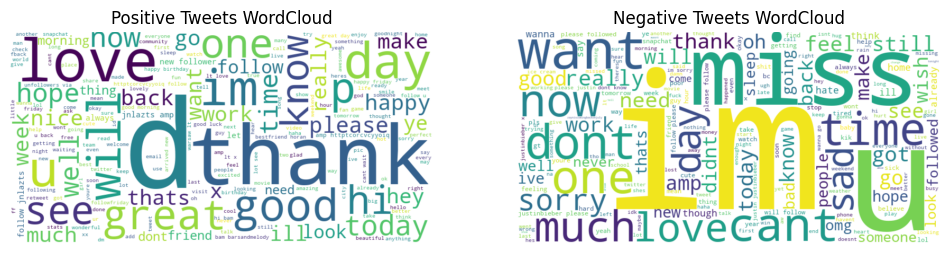

In [23]:
with open('positive_tweets.txt', 'r', encoding='utf-8') as file:
    positive_tweets = file.readlines()

with open('negative_tweets.txt', 'r', encoding='utf-8') as file:
    negative_tweets = file.readlines()

positive_tweets = [clean_text(tweet) for tweet in positive_tweets]
negative_tweets = [clean_text(tweet) for tweet in negative_tweets]

# Generate WordCloud for positive tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
# Generate WordCloud for negative tweets
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tweets))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Tweets WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Tweets WordCloud')
plt.axis('off')

plt.show()


In [24]:
# Create TF-IDF vectorizer for positive tweets
tfidf_vectorizer_positive = TfidfVectorizer(preprocessor=clean_text)

# Fit and transform the corpus for positive tweets
tfidf_matrix_positive = tfidf_vectorizer_positive.fit_transform(positive_tweets)

# Get feature names (words) and their corresponding TF-IDF values for positive tweets
feature_names_positive = tfidf_vectorizer_positive.get_feature_names_out()
tfidf_values_positive = tfidf_matrix_positive.sum(axis=0).A1

# Create a DataFrame to display words and their TF-IDF values for positive tweets
tfidf_df_positive = pd.DataFrame({'Word': feature_names_positive, 'TF-IDF': tfidf_values_positive})

# Display top TF-IDF words for positive tweets
top_positive_words = tfidf_df_positive.nlargest(30, 'TF-IDF')
print("Top 30 TF-IDF Words in Positive Tweets:")
print(top_positive_words)

# Create TF-IDF vectorizer for negative tweets
tfidf_vectorizer_negative = TfidfVectorizer(preprocessor=clean_text)

# Fit and transform the corpus for negative tweets
tfidf_matrix_negative = tfidf_vectorizer_negative.fit_transform(negative_tweets)

# Get feature names (words) and their corresponding TF-IDF values for negative tweets
feature_names_negative = tfidf_vectorizer_negative.get_feature_names_out()
tfidf_values_negative = tfidf_matrix_negative.sum(axis=0).A1

# Create a DataFrame to display words and their TF-IDF values for negative tweets
tfidf_df_negative = pd.DataFrame({'Word': feature_names_negative, 'TF-IDF': tfidf_values_negative})

# Display top TF-IDF words for negative tweets
top_negative_words = tfidf_df_negative.nlargest(30, 'TF-IDF')
print("\nTop 30 TF-IDF Words in Negative Tweets:")
print(top_negative_words)

Top 30 TF-IDF Words in Positive Tweets:
         Word      TF-IDF
12941     you  218.408337
11782      to  138.635248
11531     the  138.509506
3665      for  118.117880
423       and  100.163051
8200       my   96.620718
3645   follow   86.447406
11510  thanks   86.178779
5975       in   85.845586
6166       it   84.889446
4376     have   81.079416
7328     love   80.758822
6145       is   72.631164
7718       me   71.541654
11504   thank   66.063294
7357       lt   65.326583
8625       of   64.993968
12951    your   58.460219
11657    this   56.643765
4072     good   55.897050
10707      so   55.083550
8707       on   54.797098
11520    that   50.846998
315       all   50.428215
2482      day   50.334339
5924       im   49.663660
949        be   49.487248
4331    happy   49.376397
6178      its   48.236578
1573      can   47.756640

Top 30 TF-IDF Words in Negative Tweets:
           Word      TF-IDF
9479         to  143.890944
6048         me  133.924881
10452       you  130.326709
9

Answer to question 4: The results mostly make sense, we can see that positive words appear in the word cloud for the positive tweets and and negative word appear for the negative ones. Since I havent removed stop words or connector words we can see some of them appearing in both wordclouds with them being "neutral words". As we can see using the tfidf, the words in the word cloud seem familiar in frequency and thus support our findings.